## Regularization

Welcome to the second assignment of this week. Deep Learning have so much flexibility and capability that overfitting can be a serious problem, if the training dataset is not big enough. Sure it does well on the training set, but the learned network doesn't generalize to new examples that it has never seen!

**You will learn to:** use regularization in your deep learning models. 



### 1-Packages

In [2]:
import os

In [3]:
os.chdir('/app/Chapter02-Hyper-parameters-fine-Tuning/W1A2')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import scipy.io

from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters 
from testCases import *
from public_tests import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray' 

%load_ext autoreload
%autoreload 2


2025-10-05 14:02:28.502893: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-10-05 14:02:28.502948: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-10-05 14:02:28.504178: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-10-05 14:02:28.511693: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-05 14:02:29.549975: W tensorflow/comp

#### 2-Problem Statement 

You have just been hire as an AI expert by the French Football Corporation. They would like you to recommend positions where France's goal keeper should kick the ball so that the french team's player then hit it  with their head. 


<img src="images/field_kiank.png" style="width:600px;height:350px;">

<caption><center><font color='purple'><b>Figure 1</b>: Football field. The goal keeper kicks the ball in the air, the players of each team are fighting to hit the ball with their head </font></center></caption>


They give you the following 2D dataset from France's past 10 games.


#### 3-Loading the Dataset


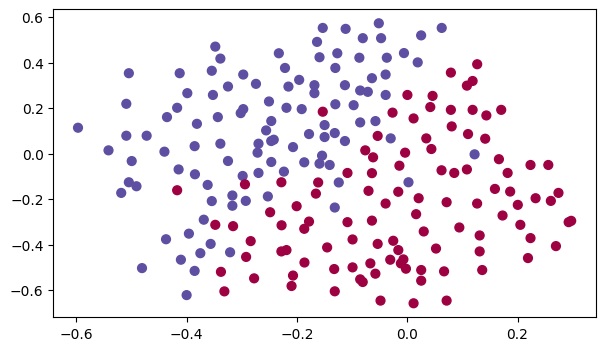

In [9]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

Each dot corresponds to a position on the football field where a football player has hit the ball with her/his head after the french goal keeper has shot the ball from the left side of the football field. 
- if the dot is blue, it means the French player managed to hit the ball
- if the dot is red, it means the other team's player hit the ball

You goal: Use a deep learning model to find the positions on the field where the goalkeeper should kick the ball. ]

Ananlysis of the dataset: This dataset is a little noisy, but it look like a diagonal line separating the upper left half from the lower right half would work well.  

You will first try a non-regularized model. Then you'll learn how to regularize it and decide which model you will choose to solve the French Football Corporation's problem.  



#### 4 - Non-Regularized Model


You will use the following neural network (already implemented for you below). This model can be used:
- in *regularization mode* -- by setting the `lambd` input to a non-zero value. We use "`lambd`" instead of "`lambda`" because "`lambda`" is a reserved keyword in Python. 
- in *dropout mode* -- by setting the `keep_prob` to a value less than one

You will first try the model without any regularization. Then, you will implement:
- *L2 regularization* -- functions: "`compute_cost_with_regularization()`" and "`backward_propagation_with_regularization()`"
- *Dropout* -- functions: "`forward_propagation_with_dropout()`" and "`backward_propagation_with_dropout()`"

In each part, you will run this model with the correct inputs so that it calls the functions you've implemented. Take a look at the code below to familiarize yourself with the model.

In [15]:
def model(X, Y, learning_rate = 0.03, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob=1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar
                 (keep_prob=1 means no dropout)
                 
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                          # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]
    
    ##INITIALIZE PARAMETERS
    parameters = initialize_parameters(layers_dims)
    
    ## LOOP (gradient descent)
    for i in range(0, num_iterations):
        
        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)
        
        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)
        
        # Backward propagation.
        assert(lambd==0 or keep_prob==1)  # it is possible to use L2 regularization or dropout
                                         # but this assignment will only explore one at a time
                                         
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)
 
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        # Print the cost every 10000 training example
        if print_cost and i % 10000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)
    
    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Cost after iteration 0: 0.655741
Cost after iteration 10000: 0.223097
Cost after iteration 20000: 0.191392


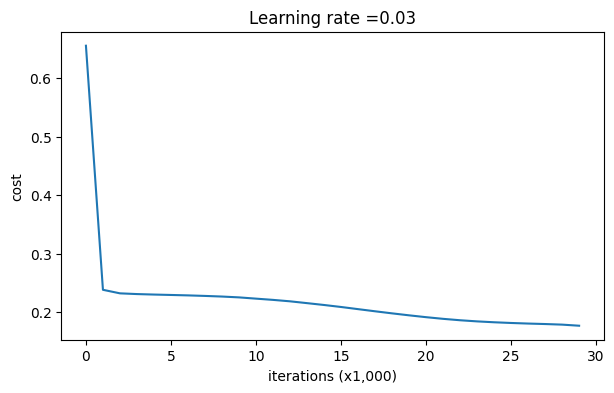

On the training set:
Accuracy: 0.9383886255924171
On the test set:
Accuracy: 0.945


In [20]:
### Let's train the model without any regularization
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

The train accuracy is 93.8% while the test accuracy is 94.5%. This is the baseline model (you will observe the impact of regularization on this model)

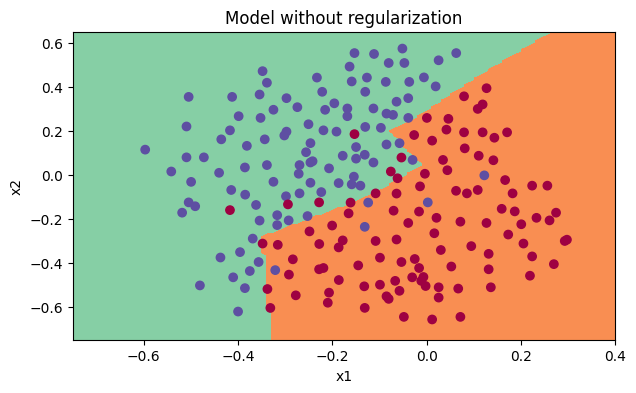

In [19]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y[0, :])

The non-regularized model is obviously overfitting the training set. It is fitting the noisy points!!!  Let's now look at two techniques to reduce overfitting: L2 regularization and dropout.

#### 5-L2 Regularization

The standard way to avoid overfitting is called L2 regularization. it consists of appropriately modifing your cost function, from:
$$J = -\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small  y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} \tag{1}$$
To:
$$J_{regularized} = \small \underbrace{-\frac{1}{m} \sum\limits_{i = 1}^{m} \large{(}\small y^{(i)}\log\left(a^{[L](i)}\right) + (1-y^{(i)})\log\left(1- a^{[L](i)}\right) \large{)} }_\text{cross-entropy cost} + \underbrace{\frac{1}{m} \frac{\lambda}{2} \sum\limits_l\sum\limits_k\sum\limits_j W_{k,j}^{[l]2} }_\text{L2 regularization cost} \tag{2}$$

Let's modify your cost and observe the consequences

### Exercise 1 - compute_cost_with_regularization
Implement `compute_cost_with_regularization()` which computes the cost given by formula (2). To calculate $\sum\limits_k\sum\limits_j W_{k,j}^{[l]2}$  , use :
```python
np.sum(np.square(Wl))
```
Note that you have to do this for $W^{[1]}$, $W^{[2]}$ and $W^{[3]}$, then sum the three terms and multiply by $ \frac{1}{m} \frac{\lambda}{2} $.

In [21]:
## GRADE FUNCTION: compute_cost_with_regularization
def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.
    
    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (1, number of examples)
    Y -- "true" labels vector, of shape (1, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3":
                    parameters['W1'] = W1
                    parameters['b1'] = b1
                    parameters['W2'] = W2
                    parameters['b2'] = b2
                    parameters['W3'] = W3
                    parameters['b3'] = b3
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"] 
    W3 = parameters["W3"]
    
    # Compute the cross-entropy cost
    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost
    
    # Compute L2 regularization cost
    L2_regularization_cost = 0
    
    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (lambd/(2*m))*(np.sum(np.square(parameters["W1"])) + np.sum(np.square(parameters["W2"])) + np.sum(np.square(parameters["W3"])))
    ### END CODE HERE ###
    
    cost = cross_entropy_cost + L2_regularization_cost
    
    return cost

In [22]:
A3, t_Y, parameters = compute_cost_with_regularization_test_case()
cost = compute_cost_with_regularization(A3, t_Y, parameters, lambd=0.1)
print("cost = " + str(cost))

compute_cost_with_regularization_test(compute_cost_with_regularization)

cost = 1.7864859451590758
 All tests passed.


Of course, beacuse you changed the cost,  you have to change backward propagation as well!! All the gradients have to compute with repect to this new cost. 

### Exercise 2 - backward_propagation_with_regularization
Implement the changes needed in backward propagation to take into account regularization. The changes only concern dW1, dW2 and dW3. For each, you have to add the regularization term's gradient ($\frac{d}{dW} ( \frac{1}{2}\frac{\lambda}{m}  W^2) = \frac{\lambda}{m} W$).

In [ ]:
## GRADE FUNCTION: backward_propagation_with_regularization
def backward_propagation_with_regularization(X, Y, cache, lambd):
    """
    Implement the backward propagation of our baseline model to which we added an L2 regularization.
    
    Arguments:
    X -- input dataset, of shape (input size, number of examples)
    Y -- "true" labels vector, of shape (1, number of examples)
    cache -- cache output from forward_propagation()
    lambd -- regularization hyperparameter, scalar
    
    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """
    
    m = X.shape[1]
    (Z1, A1, W1, b1, Z2, A2, W2, b2, Z3, A3, W3, b3) = cache
    
    dZ3 = A3 - Y   # derivative of cost with respect to Z3 without / m, why? because already be devided by m in the cost function  
    dW3 = 1./m * np.dot(dZ3, A2.T) + (lambd/m)*W3
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    
    dA2 = np.dot(W3.T, dZ3)
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T) + (lambd/m)*W2
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)
    
    dA1 = np.dot(W2.T, dZ2)
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T) + (lambd/m)*W1
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)
    
    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,
                 "dA2": dA2, "dZ2": dZ2, "dW2": dW2, "db2": db2,
                 "dA1": dA1, "dZ1": dZ1, "dW1": dW1, "db1": db1}
    
    return gradients